<a href="https://colab.research.google.com/github/Alitariq747/FoodVision101-PyTorch-Image-Classification-Problem/blob/main/PyTorch_Paper_Replicating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Paper Replicating

The goal of machine learning paper replicatig is: turn a ML research paper into usable code.

In here we will be replicating `vision transform architecture / research paper` with `PyTorch`

## 0. Get Setup

Lets import previously written code and required libraries.

In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0]) == 2, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


In [ ]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4036, done.
remote: Counting objects: 100% (1224/1224), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 4036 (delta 1067), reused 1080 (delta 995), pack-reused 2812
Receiving objects: 100% (4036/4036), 651.50 MiB | 39.30 MiB/s, done.
Resolving deltas: 100% (2360/2360), done.
Updating files: 100% (248/248), done.


In [ ]:
# Setup device agnostic data
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1. Get Data

In [ ]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [ ]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2. Create Datasets and Dataloaders

In [ ]:
from torchvision import transforms
from going_modular.going_modular import data_setup

# Create Image size
IMG_SIZE = 224

# Create transforms pipeline
manual_transforms = transforms.Compose([transforms.Resize((IMG_SIZE, IMG_SIZE)),
                                        transforms.ToTensor()])
manual_transforms

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)

In [ ]:
# Create a batch size of 32
BATCH_SIZE = 32

# CREATE DATALOADERS
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir, test_dir=test_dir, transform=manual_transforms,
    batch_size=BATCH_SIZE
)
len(train_dataloader), len(test_dataloader), class_names

(8, 3, ['pizza', 'steak', 'sushi'])

### 2.3 Visualzie a singel image

In [ ]:
image_batch, labels_batch = next(iter(train_dataloader))

# get the single image and its label from the batch
image, label = image_batch[0], labels_batch[0]

image.shape, label

(torch.Size([3, 224, 224]), tensor(1))

(-0.5, 223.5, 223.5, -0.5)

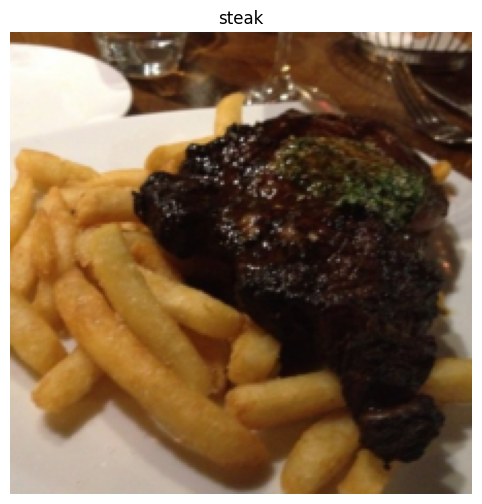

In [ ]:
# Plot single image using matplotlib
plt.figure(figsize=(8,6))
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

## 3. Replicaing Reasearch paper can be intimidating so we break it down into smaller chunks.

* ** Inputs ** -
* ** Outputs ** -
* ** Layers ** - Takes an input; manipulates it with a function.
* ** Blocks ** - A stack of layers
* ** Model ** - A collection of blocks

### 3.1 ViT overview: pieces of the puzzle

* Figure 1: Visual overview of the architecture.
* Four Equations - math equations which define the functions of each layer/block
* Table 1/3: different hyperparameters for the architecture/training
* Text

### Figure 1
![](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/08-vit-paper-figure-1-architecture-overview.png)

* Embedding = Learnable representation (start with random numbers and improve over time)

### Four Equations
![](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/08-vit-paper-four-equations.png)

### Table 1
![](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/08-vit-paper-table-1.png)

#### equation 1:

`z0` represents patch embeddings which are vectors representing flattened 2D `patches` of an image.

These patches are created by reshaping the original image into a sequence of patches.

the term `Epos` represents learnable position embeddings added to retain positional information.

xclass represents the learnable linear projection of classes in the problem.


In pseudocode:

```python
x_input = [class_token, image_patch1, image_patch2,... image_patchN] + [class_token_pos, image_patch1_pos, ....image_patchN_pos]
```


#### EQuation 2 and 3:

In equation 2 the output from eq1 is applied MSA to allow the model to focus on attention mechanisms on the input sequence while processing.

Eq3 applies multi layered perceptrons to attention-enhanced embeddings from eq2. The MLP introduces non-linear transformations to capture complex patterns in the data.

Pseudocode:
```
python
x_output_MSA_block = MSA_layer(LN_layer(x_input)) + x_input

x_output_MLP_block = MLP_layer(LN_layer(x_output_MSA_block)) + x_output_MSA_block
```

Where inputs added at the end just reflect the residual connections. Which are added to prevent our gradients to explode if parameters values are very small.

#### Equation4:

MLP = multilayer perceptron = a neural network with X number of layers
MLP = one hidden layer at training time
MLP = single linear layer at fine-tuning time

In Pseudocode:
```
y = Linear_layer(LN_layer(x_output_MLP_block))

```

#### Table 1 -> Defines various hyperparameters for our model.

* Vit-Base, ViT-Large, ViT-Huge are all different size of the same model architecture.
* Layers - the number of transformer encoder layers
* Hidden size $D$ - the embedding size throughout the architecture. -> this means a vector that is applied to every single patch. -> Or IN OTHER WORDS ITS A VECTOR WHICH COULD BE OF SIZE 768 WITH VALUES REPRESENTING EACH PATCH.
* MLP size - the number of hidden units/neurons in the MLP
* Head - the number of multi-head self-attention

## 4. Equation 1: Split data into patches and creating the class, position and patch embedding

Layers = input -> function -> output

Two main Questions in deep learning ?

Whats the input shape ?
Whats the output shape ?

* Input Image (shape): $H\times{W}\times{C}$
* Output Image (shape): ${N \times\left(P^{2} \cdot C\right)}$
* H = Height
* W = Width
* C = Color Channels
* P = patch size
* N = Number of patches = (height * width) / p^2
* D = constant latent vector size = embedding dimension.

### 4.1 Creating output shapes by hand

In [ ]:
# Create example values
height = 224
width = 224
color_channels = 3
patch_size = 16

number_of_patches = int((height * width) / patch_size**2)
number_of_patches

196

In [ ]:
# Input shape
embedding_layer_input_shape = (height, width, color_channels)

# Output shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)
print(f'Input shape (single 2D image): {embedding_layer_input_shape}')
print(f'Output shape (single 1D sequence of patches (Vector)): {embedding_layer_output_shape} -> (number_of_patches, embedding_dimension)')

Input shape (single 2D image): (224, 224, 3)
Output shape (single 1D sequence of patches (Vector)): (196, 768) -> (number_of_patches, embedding_dimension)


### 4.2 Turning a single image into patches

Let's *visualize, visualize, visualize!*

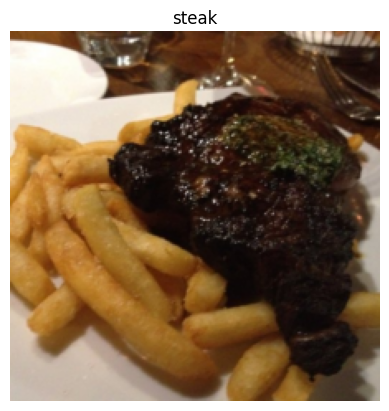

In [ ]:
# View a single image
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

In [ ]:
image.shape

torch.Size([3, 224, 224])

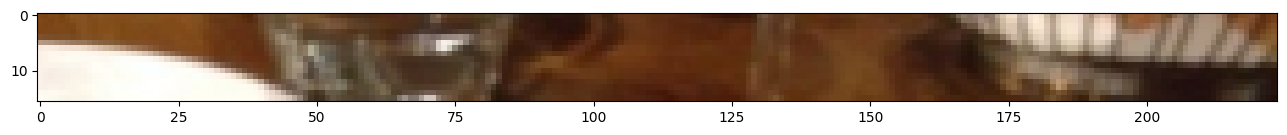

In [ ]:
# Get the top row of the image
image_permuted = image.permute(1,2,0)

# Index to plot the top row of the image above
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :]);


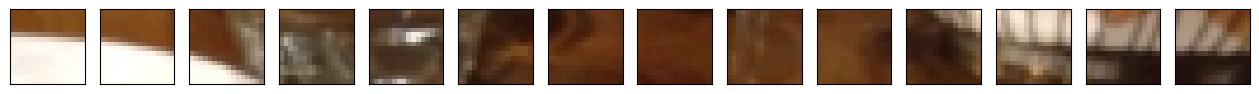

In [ ]:
# Setup code to plot top row as patches
img_size = 224
patch_size = 16

num_patches = int(img_size / patch_size)
assert img_size % patch_size == 0, 'Image size must be divisible by patch_size'

# Create a series of subplots
fig, axs = plt.subplots(nrows = 1,
                        ncols= img_size // patch_size,
                        sharex=True,
                        sharey=True,
                        figsize=(patch_size, patch_size))

# Iterate over the number of patches
for i, patch in enumerate(range(0, img_size, patch_size)):
  axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]);
  axs[i].set_label(i+1)
  axs[i].set_xticks([])
  axs[i].set_yticks([])

Number of patches per row: 14
Number of patches per column: 14
Total Patches: 196


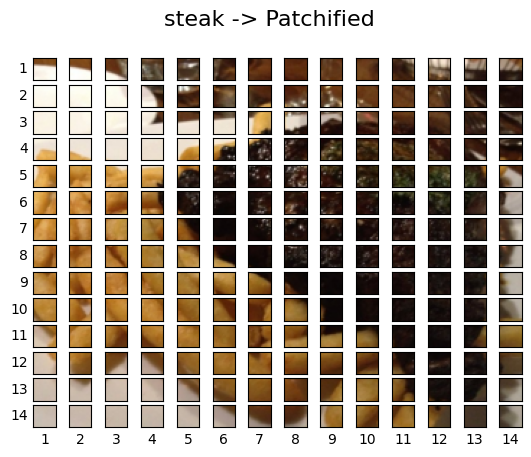

In [ ]:
# Lets turn our full image into patches
img_size = 224
patch_size = 16

num_patches = int(img_size / patch_size)
assert img_size % patch_size == 0, 'Image size must be divisible by patch_size'

print(f'Number of patches per row: {num_patches}\
\nNumber of patches per column: {num_patches}\
\nTotal Patches: {num_patches*num_patches}')

# Set up the plot
fig, axs = plt.subplots(nrows= img_size // patch_size,
                         ncols=img_size // patch_size,
                         sharex=True,
                         sharey=True)

# Loop through both height and width of the images
for i, patch_height in enumerate(range(0, img_size, patch_size)):
  for j, patch_width in enumerate(range(0, img_size, patch_size)):
    axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size,
                     patch_width:patch_width+patch_size, :])
    axs[i, j].set_ylabel(i+1,
                         rotation='horizontal',
                         horizontalalignment='right',
                         verticalalignment='center')
    axs[i, j].set_xlabel(j+1)
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])
    axs[i, j].label_outer()

fig.suptitle(f'{class_names[label]} -> Patchified', fontsize=16)
plt.show();

### 4.3 Creating image patches and turrning them into batch embeddings

Perhaps we could create the image patches and image patch embeddings in a single step using `torch.nn.Conv2d()` and setting the kernel size and stride parameters to `patch_size`.

What does conv2d does -> turns image into learnable feature embeddings

In [ ]:
# Create conv2d layer to turn into patches of learnable feature maps (embeddings)
from torch import nn

# Set the patch size
patch_size = 16

# Create a conv2d layer with hyperparameters from the vit paper
conv2d = nn.Conv2d(in_channels=3, # for color images
                   out_channels=768, # D size (embedding size)
                   kernel_size=patch_size,
                   stride=patch_size,
                   padding=0)
conv2d

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

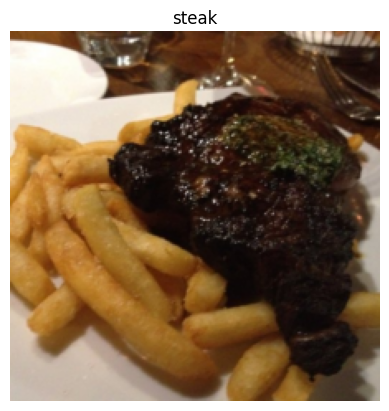

In [ ]:
# View single image
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

In [ ]:
# Pass the image through the conv2d layere
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension -> (B, C, H, W)
print(image_out_of_conv.shape)

torch.Size([1, 768, 14, 14])


In [ ]:
# What is this 14 and 14
# well number of patches i.e
14*14

196

Now we have to flatten the input spatial dimension (14 x 14) (feature map) and project to Tranformer dimension.




Showing random convolutional feature maps from indexes: [210, 295, 371, 599, 595]


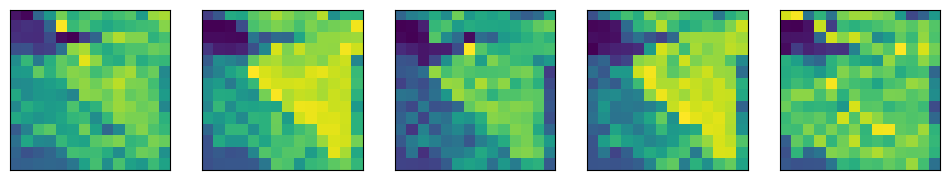

In [ ]:
# Plot random convolutional feature maps (embeddings)
import random
random_indexes = random.sample(range(0, 758), k=5)
print(f'Showing random convolutional feature maps from indexes: {random_indexes}')

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12,12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
  image_conv_feature_map = image_out_of_conv[:, idx, :, :] # index on the output tensor of conv2d layer
  axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
  axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

### 4.4 Flattening the patch embedding with `torch.nn.Flatten()`

Right now we've a series of convolutional feature maps (patch embeddings) that we want to flatten into a sequence of patch embedings to satisfy the input criteria of the ViT transformer Encoder

In [ ]:
print(image_out_of_conv.shape)

torch.Size([1, 768, 14, 14])


So we need to convert these `768` 14 x 14 feature maps into a sequence of patch embeddings.

What we want: (batch_size, number_of_patches, embedding_dim)

In [ ]:
from torch import nn
flatten_layer = nn.Flatten(start_dim=2, end_dim=3)

flatten_layer(image_out_of_conv).shape

torch.Size([1, 768, 196])

Original image shape: torch.Size([224, 224, 3])
Image turned into patches shape: torch.Size([1, 768, 14, 14])
Image turned into sequence of embeddings shape: torch.Size([1, 768, 196])


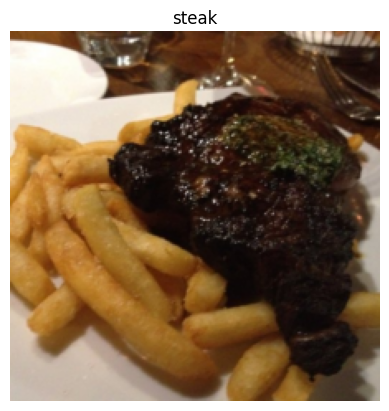

In [ ]:
# Put everything together
plt.imshow(image_permuted)
plt.title(class_names[label])
plt.axis(False)
print(f'Original image shape: {image_permuted.shape}')

# Pass image through conv2d layer
image_out_of_conv_layer = conv2d(image.unsqueeze(0)) # add batch dimension
print(f'Image turned into patches shape: {image_out_of_conv_layer.shape}')

# Flatten our feature maps into embeddings
image_out_of_flatten_layer = flatten_layer(image_out_of_conv_layer)
print(f'Image turned into sequence of embeddings shape: {image_out_of_flatten_layer.shape}')

In [ ]:
# Rearrange image output from flattened layer
image_out_of_conv_flatten_layer_permuted = image_out_of_flatten_layer.permute(0,2,1)
print(f'image_out_of_conv_flatten_layer_permuted shape: {image_out_of_conv_flatten_layer_permuted.shape}')

image_out_of_conv_flatten_layer_permuted shape: torch.Size([1, 196, 768])


In [ ]:
# Get a single flattened feature map
single_flattened_feature_map = image_out_of_conv_flatten_layer_permuted[:, :, 0]
single_flattened_feature_map.shape

torch.Size([1, 196])

(-0.5, 195.5, 0.5, -0.5)

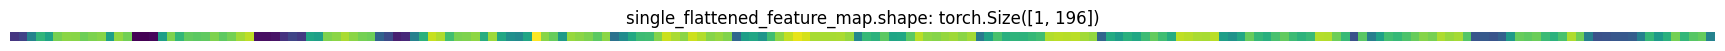

In [ ]:
# plot the flattened feature map
plt.figure(figsize=(22,22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f'single_flattened_feature_map.shape: {single_flattened_feature_map.shape}')
plt.axis(False)

### 4.5 Turning the Vit patch embedding layer into a PyTorch module

We want this module to do a few things:

1. Create a class called `PatchEmbedding` that inherits from nn.Module.
2. Initialize with appropriate hyperparameters such as embedding dimension, channels and patch size.
3. Create a layer to turn an image into embedding patches using `nn.Conv2d()`.
4. Create a layer to flatten the feature maps of the output of layer in 3.
5. Define a `forward()` that define the forward computation.
6. Make sure the output shape of the layer reflects the required output shape of patch embeddings

In [ ]:
class PatchEmbedding(nn.Module):
  def __init__(self, in_channels: int = 3,
               patch_size: int = 16,
               embedding_dim: int = 768):
    super().__init__()
  # Create a layer to turn an image into embedded patches
    self.patcher = nn.Conv2d(in_channels=in_channels,
                           out_channels=embedding_dim,
                           kernel_size=patch_size,
                           stride=patch_size,
                           padding=0)
  # Create a layer that is going to turn our feature maps/ patch embeddings into s sequence
    self.flatten= nn.Flatten(start_dim=2, end_dim=3)

  # Define a forward method
  def forward(self, x):
    # Create assertion to check that inputs are the correct shape
    image_resolution = x.shape[-1]
    assert image_resolution % patch_size == 0, f'input image size must be divisible by patch size, image_resolution: {image_resolution}, patch_size: {patch_size}'


    # Perform the forward pass
    x_patched = self.patcher(x)
    x_flattened = self.flatten(x_patched)
    return x_flattened.permute(0,2,1) # (batch_size, number_of_patches, embedding_dimension)

In [ ]:
set_seeds()

# Create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)

# Pass a single image through patch embedding layer
print(f'Input image size: {image.unsqueeze(0).shape}')
patchified_image = patchify(image.unsqueeze(0))
print(f'Output shape of patchified image: {patchified_image.shape}')

Input image size: torch.Size([1, 3, 224, 224])
Output shape of patchified image: torch.Size([1, 196, 768])


In [ ]:
# lets see how our assertion above works ..
good_image_tensor = torch.randn(1,3,224,224)
patchified_good_image_tensor = patchify(good_image_tensor)
print(patchified_good_image_tensor.shape)

torch.Size([1, 196, 768])


In [ ]:
bad_image_tensor = torch.randn(1,3,225,225)
# patchified_bad_image_tensor = patchify(bad_image_tensor)
# print(f'patchified_bad_image_tensor.shape')

### 4.6 Creating the class token embedding

Now we need to `prepend` a learnable class embedding token to the index 0 of patch embedding

In [ ]:
patchified_image.shape

torch.Size([1, 196, 768])

In [ ]:
batch_size = 1
embedding_dimension=768

In [ ]:
# Create a class token embedding as a learnable parameter that shares the same size as embedding dimension
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension))
class_token.shape

torch.Size([1, 1, 768])

In [ ]:
patchified_image.shape

torch.Size([1, 196, 768])

In [ ]:
# Lets prepend our class_token embedding to the front of the patch embedding
patchified_image_with_class_embedding = torch.cat((class_token, patchified_image),
                                                  dim=1) # No of patches dim
print(f'Patchified image shape without class token embedding: {patchified_image.shape}')
print(f'patchified_image_with_class_embedding shape: {patchified_image_with_class_embedding.shape}')
print(f'Patchified image with class token: {patchified_image_with_class_embedding}')

Patchified image shape without class token embedding: torch.Size([1, 196, 768])
patchified_image_with_class_embedding shape: torch.Size([1, 197, 768])
Patchified image with class token: tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.7895,  0.1848, -0.6599,  ...,  0.5635,  0.0235,  0.4787],
         [-0.4991,  0.2129, -0.5644,  ...,  0.5651,  0.0088,  0.4706],
         ...,
         [-0.2773,  0.0470, -0.1575,  ...,  0.1005, -0.0867,  0.2135],
         [-0.2490,  0.0356, -0.0766,  ...,  0.1518, -0.1145,  0.0882],
         [-0.6299,  0.2494, -0.0705,  ...,  0.3862, -0.2095,  0.0810]]],
       grad_fn=<CatBackward0>)


### 4.7 Creating the position embeddings

Want to create a series of 1D learnable position embeddings and to add them to the sequence of patch embeddings

In [ ]:
# View the sequence of patch embeddings with the prepended class embedding
patchified_image_with_class_embedding, patchified_image_with_class_embedding.shape

(tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [-0.7895,  0.1848, -0.6599,  ...,  0.5635,  0.0235,  0.4787],
          [-0.4991,  0.2129, -0.5644,  ...,  0.5651,  0.0088,  0.4706],
          ...,
          [-0.2773,  0.0470, -0.1575,  ...,  0.1005, -0.0867,  0.2135],
          [-0.2490,  0.0356, -0.0766,  ...,  0.1518, -0.1145,  0.0882],
          [-0.6299,  0.2494, -0.0705,  ...,  0.3862, -0.2095,  0.0810]]],
        grad_fn=<CatBackward0>),
 torch.Size([1, 197, 768]))

In [ ]:
# Calculate N (num of patches)
number_of_patches = int((height * width) / patch_size**2)
number_of_patches

# Get the embedding  dimension
embedding_dimension = patchified_image_with_class_embedding.shape[-1]
embedding_dimension

# Create a learnable 1D Position embedding
position_embedding = nn.Parameter(torch.ones(1, number_of_patches +1,
                                             embedding_dimension),
                                  requires_grad=True)
position_embedding, position_embedding.shape

(Parameter containing:
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]], requires_grad=True),
 torch.Size([1, 197, 768]))

In [ ]:
# Add the position embedding to the patch and class token embedding
patch_and_postion_embedding = position_embedding + patchified_image_with_class_embedding
print(patch_and_postion_embedding)
print(f'Patch and position embedding shape: {patch_and_postion_embedding.shape}')

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.2105, 1.1848, 0.3401,  ..., 1.5635, 1.0235, 1.4787],
         [0.5009, 1.2129, 0.4356,  ..., 1.5651, 1.0088, 1.4706],
         ...,
         [0.7227, 1.0470, 0.8425,  ..., 1.1005, 0.9133, 1.2135],
         [0.7510, 1.0356, 0.9234,  ..., 1.1518, 0.8855, 1.0882],
         [0.3701, 1.2494, 0.9295,  ..., 1.3862, 0.7905, 1.0810]]],
       grad_fn=<AddBackward0>)
Patch and position embedding shape: torch.Size([1, 197, 768])


### 4.8 Putting it all together: from image to embedding

We have written code turn an image in a flattened sequence of patch embeddings

Now lets do it all in a single cell

In [ ]:
# Set seeds
set_seeds()

# 1. Set the patch size
patch_size = 16

# 2. Print shapes of the original image tensor
print(f'Image tensor shape: {image.shape}')
height, width = image.shape[1], image.shape[2]

# 3. Get image tensor and add a batch dimension
x = image.unsqueeze(0)
print(f'input image shape: {x.shape}')

# 4. Create patch embedding layer
patch_embedded_layer = PatchEmbedding(in_channels=3,
                                      patch_size=patch_size,
                                      embedding_dim=768)

# 5. Pass input x through patch_embedding
patch_embedding = patch_embedded_layer(x)
print(f'Patch embedding layer shape: {patch_embedding.shape}')

# 6. Create a class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1 , embedding_dimension), requires_grad=True) # make sure its learnable
print(f'class_token embedding shape: {class_token.shape}')

# 7. Prepend the class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f'Patch embedding with class token: {patch_embedding_class_token.shape}')

# 8. Create the position embedding and add to class_and_patch_embedding
number_of_patches = int((height*width)/ patch_size**2)
position_embedding = nn.Parameter(torch.ones(batch_size, number_of_patches + 1, embedding_dimension ),
                                  requires_grad=True)

# 9. Add the position embedding to patch embedding with class token
position_class_patch_embedding = patch_embedding_class_token + position_embedding
print(f'Patch and position embedding with class token: {position_class_patch_embedding.shape}')


Image tensor shape: torch.Size([3, 224, 224])
input image shape: torch.Size([1, 3, 224, 224])
Patch embedding layer shape: torch.Size([1, 196, 768])
class_token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token: torch.Size([1, 197, 768])
Patch and position embedding with class token: torch.Size([1, 197, 768])


Remember we prepend the class embedding to number of patches in patch embedding and we `ADD` the position embeddings across all patches

## 5. Equation 2: MultiHead Self Attention (MSA Block)

* Multihead self-attention: which part of the sequence should pay most attention to itself. ?
 * In our case, we have a series of embedded image patches, which patch significantly relates to another patch.
 * We want our neural network (ViT) to learn this relationship / representation.

* To replicate MSA in PyTorch we can use `torch.nn.MultiheadAttention module.
* LayerNorm = Layer normalization is a technique to normalize the distributions of intermediate layers. It enables smoother gradients, faster training and better generalization accuracy.
  * Normalization = make everything have the same mean and same standard deviation.
  * In pytorch `torch.nn.LayerNorm` normalizes values over $D$ dimension which in our case is the embedding dimension.

In [ ]:
class MultiHeadSelfAttentionBlock(nn.Module):
  def __init__(self, embedding_dim: int=768,
               num_heads: int=12,
               attn_dropout: int=0):
    super().__init__()

    # Create the norm layer
    self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dimension)

    # Create multihead attention (MSA) layer
    self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                num_heads=num_heads,
                                                dropout=attn_dropout,
                                                batch_first=True) # is the batch first? (batch, seq, feature) -> (batch, number_of_patches, embedding_dimension)

  def forward(self, x):
    x = self.layer_norm(x)
    attn_output, _ = self.multihead_attn(query=x, key=x, value=x,
                                         need_weights=False)
    return attn_output

In [ ]:
# Create an instance of MSA block
multi_head_self_attention_block = MultiHeadSelfAttentionBlock(embedding_dim=768,
                                                              num_heads=12,
                                                              attn_dropout=0)
# Pass out class and position embedding sequence through the multi-head-attention-block
patched_image_through_msa_block = multi_head_self_attention_block(position_class_patch_embedding)
print(f'Input shape of MSA Block: {position_class_patch_embedding.shape}')
print(f'Output shape of MSA Block: {patched_image_through_msa_block.shape}')

Input shape of MSA Block: torch.Size([1, 197, 768])
Output shape of MSA Block: torch.Size([1, 197, 768])


Shapes doesnot change but values do change inside these sequences.

## 6. Equation 3: Multilayer Perceptron (MLP Block)

* **MLP** = The MLP contains two layers with a GELU non-linearity (section 3.1).
 * MLP = a quite broad term for a block with a series of layer(s), layer can be multiple or even only one hidden layer.
 * Layers can mean: fully-connected, dense, linear, feed-forward, all are often similar names for the same thing. In PyTorch they are called `torch.nn.Linear`.
 * MLP number of hidden units = MLP size in table1 - for Base Model its 3072

* **Dropout** ???

In pseudocode:
```python
# MLP
x = linear -> non-linear -> dropout -> linear -> dropout
```

In [ ]:
class MLPBlock(nn.Module):
  def __init__(self, embedding_dim: int=768,
               mlp_size: int=3072,
               dropout: int=0.1):
    super().__init__()

    # Create the norm layer (LN)
    self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

    # Create the MLP
    self.mlp = nn.Sequential(
        nn.Linear(in_features=embedding_dim, out_features=mlp_size),
        nn.GELU(),
        nn.Dropout(p=dropout),
        nn.Linear(in_features=mlp_size, out_features=embedding_dim),
        nn.Dropout(p=dropout)
    )

  def forward(self, x):
    x = self.layer_norm(x)
    x = self.mlp(x)
    return x


In [ ]:
# Create an instance of MLPBlock
mlp_block = MLPBlock(embedding_dim=768,
                     mlp_size=3072,
                     dropout=0.1)

# Pass image passed from MSA block now from MLP block
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f'Input shape of MLP Block: {patched_image_through_msa_block.shape}')
print(f'Output shape of MLP block: {patched_image_through_mlp_block.shape}')

Input shape of MLP Block: torch.Size([1, 197, 768])
Output shape of MLP block: torch.Size([1, 197, 768])


In [ ]:
patched_image_through_msa_block

tensor([[[-0.2000, -0.2028,  0.0556,  ..., -0.4020,  0.8707, -0.4459],
         [-0.1973, -0.1881,  0.0680,  ..., -0.3918,  0.8901, -0.4664],
         [-0.1968, -0.1892,  0.0684,  ..., -0.3921,  0.8905, -0.4657],
         ...,
         [-0.1948, -0.1945,  0.0635,  ..., -0.3928,  0.8879, -0.4674],
         [-0.1935, -0.1952,  0.0637,  ..., -0.3945,  0.8895, -0.4684],
         [-0.1967, -0.1973,  0.0656,  ..., -0.3932,  0.8886, -0.4673]]],
       grad_fn=<TransposeBackward0>)

In [ ]:
patched_image_through_mlp_block

tensor([[[-0.0145, -0.0207,  0.2001,  ..., -0.0000, -0.1787,  0.2341],
         [-0.0646, -0.1285,  0.3137,  ..., -0.1159, -0.1464,  0.2283],
         [ 0.0327, -0.0553,  0.3277,  ..., -0.0000, -0.2104,  0.2201],
         ...,
         [-0.1413, -0.0313,  0.3140,  ...,  0.0774, -0.2343,  0.3149],
         [-0.0751,  0.0376,  0.0000,  ...,  0.0288, -0.1979,  0.1060],
         [-0.0423, -0.0296,  0.2908,  ..., -0.1408, -0.1680,  0.2140]]],
       grad_fn=<MulBackward0>)

## 7. Creating the Transformer Encoder

The Transformer Encoder is a combination of alternating blocks of MSA (equation 2) and MLP (equation 3).

And there are residual connections between each block.

* Encoder = turn a sequence into learnable representation.
* Decoder = go from a learned representation back to some sort of sequence.
* Residual connections = add layer(s) input to its subsequent output, this enables the creation of deeper networks (prevents weights from getting too small)

In Psedocode
```python
# Tranformer Encoder
x_input -> MSA_block -> [MSA_block_output + x_input] -> MLP_block -> [MLP_Block_output + MSA_block_output + x_input] -> ...
```

### 7.1 Create a custom Transformer Encoder Block

In [ ]:
class TransformerEncoderBlock(nn.Module):
  def __init__(self, embedding_dim: int=768,
               num_heads: int=12,
               mlp_size: int=3072,
               mlp_dropout: int=0.1,
               attn_dropout: int=0):
    super().__init__()

    # Create MSA Block (equation 2)
    self.msa_block = MultiHeadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                 num_heads=num_heads,
                                                 attn_dropout=attn_dropout)

    self.mlp_block = MLPBlock(embedding_dim=embedding_dim,
                              mlp_size=mlp_size,
                              dropout=mlp_dropout)

  def forward(self, x):
    x = self.msa_block(x) + x # residual / skip connection from eq:2
    x = self.mlp_block(x) + x # residual / skip connection from eq:3
    return x


In [ ]:
# create an instance of TransformerEncoderBlock()
transformer_encoder_block = TransformerEncoderBlock()

# get a summary using torchinfo.summary
summary(model=transformer_encoder_block,
        input_size=(1, 197, 768),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiHeadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

### 7.2 Create a Transformer Encoder layer with in built PyTorch Layers

So far we've created a transformer enocder by hand.

But because of how good the transformer architecture is, PyTorch has implemented ready to use Transformer Encoder layers.
> See pytorch doc's

We can create a Transformer Encoder with pure PyTorch layers

In [ ]:
# Create the same as above with torch.nn.TransformerEncoderLayer()
torch_transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=768,
                                                             nhead=12,
                                                             dim_feedforward=3072,
                                                             dropout=0.1,
                                                             activation='gelu',
                                                             batch_first=True,
                                                             norm_first=True)
torch_transformer_encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [ ]:
# get a summary using torchinfo.summary
summary(model=torch_transformer_encoder_layer,
        input_size=(1, 197, 768),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderLayer (TransformerEncoderLayer)  [1, 197, 768]        [1, 197, 768]        7,087,872            True
Total params: 7,087,872
Trainable params: 7,087,872
Non-trainable params: 0
Total mult-adds (M): 0
Input size (MB): 0.61
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.61

## 8. Putting it all together to create ViT

In [ ]:
# Create a ViT class
class ViT(nn.Module):
  def __init__(self, img_size: int=224,
               in_channels: int=3,
               patch_size: int=16,
               num_tansformer_layers: int=12,
               embedding_dim: int=768,
               mlp_size: int=3072,
               num_heads: int=12,
               attn_dropout: int=0,
               mlp_dropout: int=0.1,
               embedding_dropout: int=0.1, # dropout for patch and position embeddings
               num_classes: int=1000):
    super().__init__()
    # Make an assertion that image size is compatible with the patch size
    assert img_size % patch_size == 0, f'Image size must be divisible by patch size,  image: {img_size} patch size: {patch_size}'

    # Calculate the number of patches (height * width / patch ^2)
    self.num_patches = (img_size * img_size )// patch_size**2

    # Create learnable class embedding (needs to go at front of sequence of patch embeddings)
    self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                        requires_grad=True)

    # Create Learnable Position embedding
    self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                           requires_grad=True)

    # Create embedding dropout value
    self.embedding_dropout = nn.Dropout(p=embedding_dropout)

    # Create patch embedding layer
    self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                          patch_size=patch_size,
                                          embedding_dim=embedding_dim)

    # Create the Transformer encoder block
    self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                       num_heads=num_heads,
                                                                       mlp_size=mlp_size,
                                                                       mlp_dropout=mlp_dropout
                                                                       )for _ in range(num_tansformer_layers)])

    # Create classifier head
    self.classifier = nn.Sequential(
        nn.LayerNorm(normalized_shape=embedding_dim),
        nn.Linear(in_features=embedding_dim,
                  out_features=num_classes)
    )

  def forward(self, x):
    # Get the batch size
    batch_size = x.shape[0]

    # Create class token embedding and expand it to match the batch size
    class_token = self.class_embedding.expand(batch_size, -1, -1) # -1 means to infer dimensions -> to spread class embeddings across entire batch

    # Create the patch embedding (equation 1)
    x = self.patch_embedding(x)

    # Concat class token embedding and patch embedding (equation 1)
    x = torch.cat((class_token, x), dim=1) # (batch_size, number_of_patches, embedding_dim)

    # Add position embedding
    x = self.position_embedding + x

    # Apply dropout to patch embedding (As in paper)

    x = self.embedding_dropout(x)

    # Pass position and patch embedding to Transformer Encoder
    x = self.transformer_encoder(x)

    # Put 0th index logit through the classifier
    x = self.classifier(x[:, 0])
    return x

In [ ]:
set_seeds()

# Create a random image tensor with the same shape as a single image
random_image_tensor = torch.randn(1,3,224,224)

# Create an instance of ViT with the number of classes we're working with
vit = ViT(num_classes=len(class_names))

# Pass the random image tensor to our ViT instance
y = vit(random_image_tensor)
y.shape

torch.Size([1, 3])

### 8.1 Getting a visual summary of our ViT model

In [ ]:
summary(model=vit,
        input_size=(1, 3, 224, 224),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [1, 3, 224, 224]     [1, 3]               152,064              True
├─PatchEmbedding (patch_embedding)                           [1, 3, 224, 224]     [1, 196, 768]        --                   True
│    └─Conv2d (patcher)                                      [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
│    └─Flatten (flatten)                                     [1, 768, 14, 14]     [1, 768, 196]        --                   --
├─Dropout (embedding_dropout)                                [1, 197, 768]        [1, 197, 768]        --                   --
├─Sequential (transformer_encoder)                           [1, 197, 768]        [1, 197, 768]        --                   True
│    └─TransformerEncoderBlock (0)                           [1, 197, 768]        [1, 197, 768] 

## 9. Setting up training code for our custom ViT ?
We've replicated the ViT architecture, now lets see how it performs on FoodVision Mini Data

### 9.1 Creating an optimizer

The paper states it uses the Adam optimizer with $B1$ value of 0.9, $B2$ of 0.999 (Defaults) and a weight decay of 0.1

Weight decay is a regularization technique by adding a small penalty and it prevents over fitting.



In [ ]:
optimizer = torch.optim.Adam(vit.parameters(), lr = 1e-3,
                             betas=(0.9, 0.999),
                             weight_decay=0.1)


### 9.2 Creating a Loss function

In [ ]:
loss_fn = nn.CrossEntropyLoss()

### 9.3 Training our model

In [ ]:
# from going_modular.going_modular import engine

# results = engine.train(model=vit, train_dataloader=train_dataloader,
#                        test_dataloader=test_dataloader, optimizer=optimizer,
#                        loss_fn=loss_fn, epochs=10, device=device)
# results

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 4.2338 | train_acc: 0.2812 | test_loss: 1.5526 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.5796 | train_acc: 0.3047 | test_loss: 1.3806 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1761 | train_acc: 0.4141 | test_loss: 4.0468 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.8344 | train_acc: 0.3867 | test_loss: 1.7689 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.3029 | train_acc: 0.2617 | test_loss: 1.0974 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.1955 | train_acc: 0.3438 | test_loss: 1.1466 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.2104 | train_acc: 0.2344 | test_loss: 1.5358 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1126 | train_acc: 0.4219 | test_loss: 2.1112 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.3194 | train_acc: 0.3164 | test_loss: 1.6852 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.5515 | train_acc: 0.2852 | test_loss: 1.4252 | test_acc: 0.2604


{'train_loss': [4.233799800276756,
  1.5796453952789307,
  1.1760864704847336,
  1.8344319686293602,
  1.3028676360845566,
  1.195519208908081,
  1.2103932052850723,
  1.1126024797558784,
  1.3193972557783127,
  1.5515401810407639],
 'train_acc': [0.28125,
  0.3046875,
  0.4140625,
  0.38671875,
  0.26171875,
  0.34375,
  0.234375,
  0.421875,
  0.31640625,
  0.28515625],
 'test_loss': [1.5525635083516438,
  1.38058074315389,
  4.046802918116252,
  1.7688686052958171,
  1.0974050958951314,
  1.1466379364331563,
  1.5357993443806965,
  2.11123255888621,
  1.6851558337608974,
  1.4252090255419414],
 'test_acc': [0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.5416666666666666,
  0.2604166666666667]}

From the looks of our first experiment with ViT; it seems the model is under-fitting

### 9.4 What our training setup is missing ?
Well the foremost factor is the `less data` plus they implemented Learning rate decay among other things to prevent overfitting like gradient clipping and learning rate warm up

### Plotting loss curves for our model

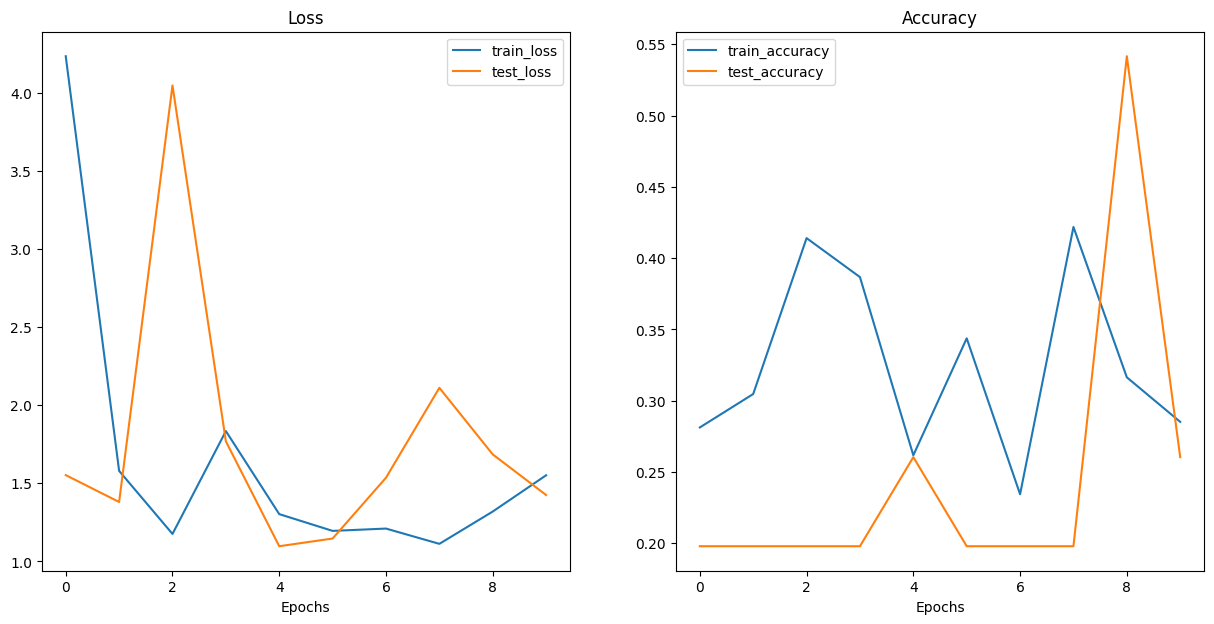

In [ ]:
# from helper_functions import plot_loss_curves
# plot_loss_curves(results)

## 10. Using a pretrained ViT from `torchvision.models`

If you can find a pre trained model from a large dataset, use transfer learning for your won dataset and often it achieves great results.

In [ ]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Preparing model with pretrained weights from torchvision.models

In [ ]:
# Get pretrained weights for ViT Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# Freeze the base parameters
for parameter in pretrained_vit.parameters():
  parameter.requires_grad = False

In [ ]:
summary(model=pretrained_vit,
        input_size=(1, 3, 224, 224),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 1000]            768                  False
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 197

In [ ]:
# Update the classifier head
set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names))

In [ ]:
summary(model=pretrained_vit,
        input_size=(1, 3, 224, 224),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

### Preparing Data for the pretrained_ViT model from torchvision.models

In [ ]:
# Get automtic transforms from pretrained ViT weights
vit_transforms = pretrained_vit_weights.transforms()
vit_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
# Setup dataloaders
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=vit_transforms,
                                                                                                     batch_size=32)


### Train Feature extractor ViT model

In [ ]:
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# set_seeds()

# from going_modular.going_modular import engine
# results_pretrained_vit = engine.train(model=pretrained_vit,
#                                   train_dataloader=train_dataloader_pretrained,
#                                   test_dataloader=test_dataloader_pretrained,
#                                   optimizer=optimizer,
#                                   loss_fn=loss_fn,
#                                       epochs=10,
#                                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7663 | train_acc: 0.7188 | test_loss: 0.5435 | test_acc: 0.8769
Epoch: 2 | train_loss: 0.3436 | train_acc: 0.9453 | test_loss: 0.3257 | test_acc: 0.8977
Epoch: 3 | train_loss: 0.2068 | train_acc: 0.9492 | test_loss: 0.2698 | test_acc: 0.9186
Epoch: 4 | train_loss: 0.1557 | train_acc: 0.9609 | test_loss: 0.2414 | test_acc: 0.9186
Epoch: 5 | train_loss: 0.1244 | train_acc: 0.9727 | test_loss: 0.2271 | test_acc: 0.8977
Epoch: 6 | train_loss: 0.1210 | train_acc: 0.9766 | test_loss: 0.2122 | test_acc: 0.9280
Epoch: 7 | train_loss: 0.0933 | train_acc: 0.9766 | test_loss: 0.2342 | test_acc: 0.8883
Epoch: 8 | train_loss: 0.0793 | train_acc: 0.9844 | test_loss: 0.2268 | test_acc: 0.9081
Epoch: 9 | train_loss: 0.1084 | train_acc: 0.9883 | test_loss: 0.2064 | test_acc: 0.9384
Epoch: 10 | train_loss: 0.0646 | train_acc: 0.9922 | test_loss: 0.1795 | test_acc: 0.9176


In [ ]:
results_pretrained_vit

{'train_loss': [0.7663078159093857,
  0.34357580356299877,
  0.2068282482214272,
  0.15565911354497075,
  0.12437294516712427,
  0.12098945118486881,
  0.09329075238201767,
  0.07929671721649356,
  0.10844357078894973,
  0.0646320934756659],
 'train_acc': [0.71875,
  0.9453125,
  0.94921875,
  0.9609375,
  0.97265625,
  0.9765625,
  0.9765625,
  0.984375,
  0.98828125,
  0.9921875],
 'test_loss': [0.5435076157251993,
  0.32568228244781494,
  0.2698140541712443,
  0.24144025146961212,
  0.2271267225344976,
  0.21221705774466196,
  0.2341588685909907,
  0.2268028954664866,
  0.20640290776888529,
  0.1795396407445272],
 'test_acc': [0.8768939393939394,
  0.8977272727272728,
  0.9185606060606061,
  0.9185606060606061,
  0.8977272727272728,
  0.9280303030303031,
  0.8882575757575758,
  0.9081439393939394,
  0.9384469696969697,
  0.9176136363636364]}

### Plot the loss curves of our petrained vit transformer model

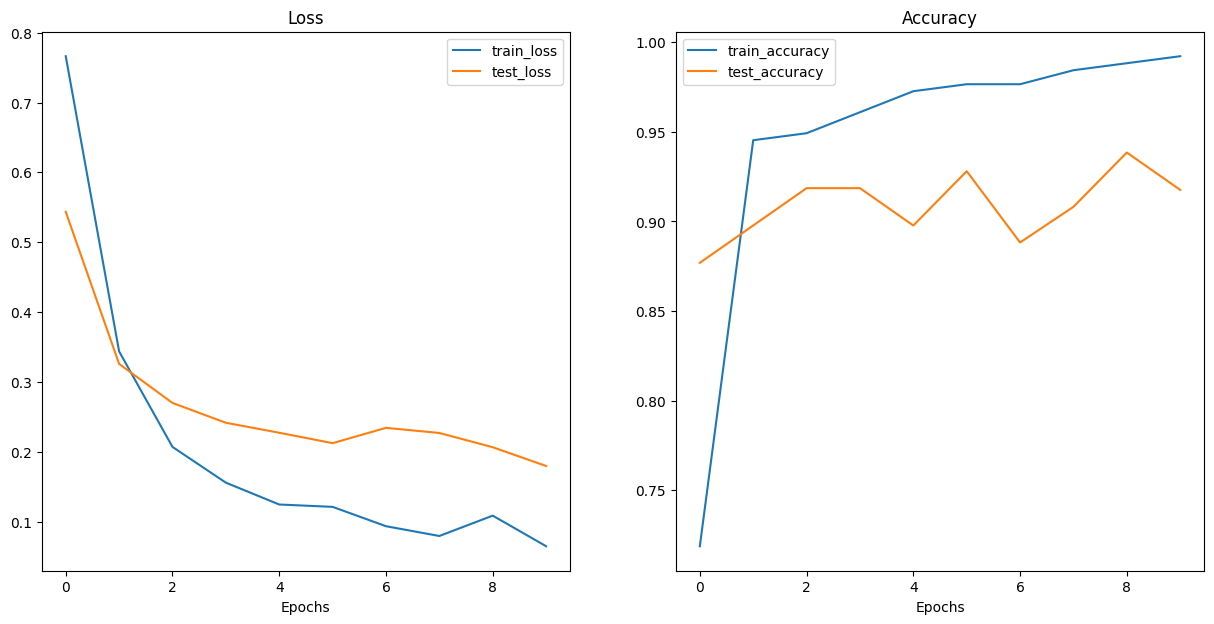

In [ ]:
from helper_functions import plot_loss_curves
plot_loss_curves(results_pretrained_vit)

### Save our best performing model ViT model

Now we've got a model that performs quite well, how about we save it to file and check its size

In [ ]:
# Save the model
from going_modular.going_modular import utils
utils.save_model(model=pretrained_vit,
                 target_dir='models',
                 model_name='08_pretrained_vit_feature_extractor_pizza_steak_sushki.pth')

[INFO] Saving model to: models/08_pretrained_vit_feature_extractor_pizza_steak_sushki.pth


In [ ]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path('models/08_pretrained_vit_feature_extractor_pizza_steak_sushki.pth').stat().st_size // (1024*1024)
print(f'Pretrained ViT feature Extractor model size: {pretrained_vit_model_size}')

Pretrained ViT feature Extractor model size: 327


Our pretrained ViT gets some of the best results we've seen so far but its way too large to be deployed on a website or a mobile application.

## 11. Predicting a custom Image on Pretrained ViT

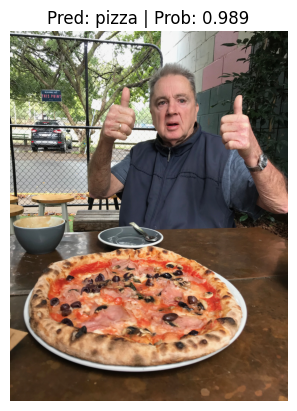

In [ ]:
import requests

# Import function to make predictions on images and plot them
from going_modular.going_modular.predictions import pred_and_plot_image

# Setup custom image path
custom_image_path = image_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

# Predict on custom image
pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)